In [ ]:
# Can you also share on how we can make use of axes framework in seaborn?

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = sns.load_dataset("tips")

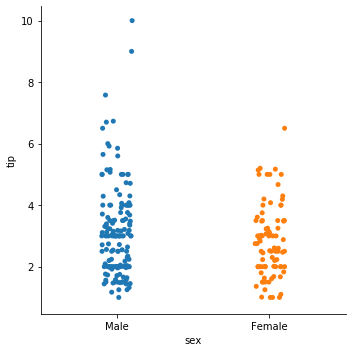

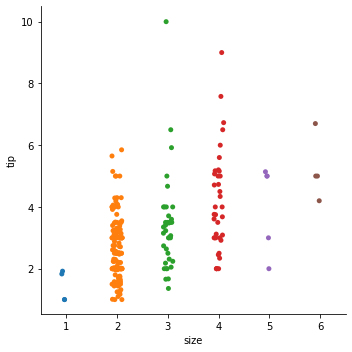

In [35]:
c1 = sns.catplot(x="sex", y="tip", data=df)
c2 = sns.catplot(x="size", y="tip", data=df)
# plt.show()

In [91]:
# c1.facet_axis(0,0)

In [24]:
os.getcwd()

'C:\\Users\\balap\\Desktop\\teaching\\pydot25\\day08-chatbots'

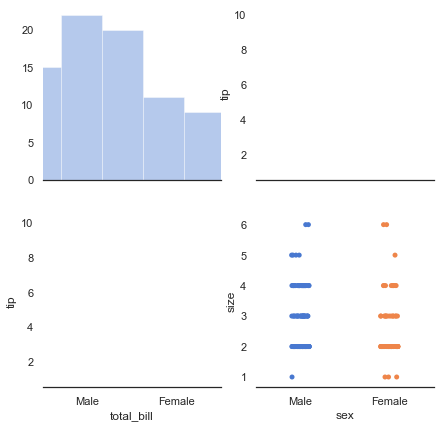

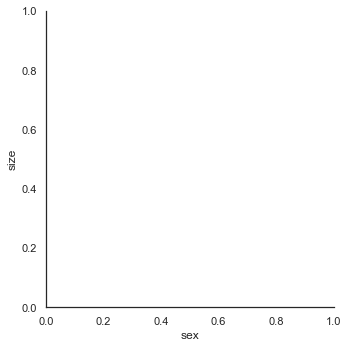

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
ax = ax.flatten()
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

sns.distplot(d, kde=False, color="b", ax=ax[0])
sns.lineplot(x="total_bill", y="tip", data=df, ax=ax[1])
sns.lineplot(x="total_bill", y="tip", data=df, ax=ax[2])
sns.catplot(x="sex", y="size", data=df, ax=ax[3])

plt.setp(axes, yticks=[])
plt.tight_layout()

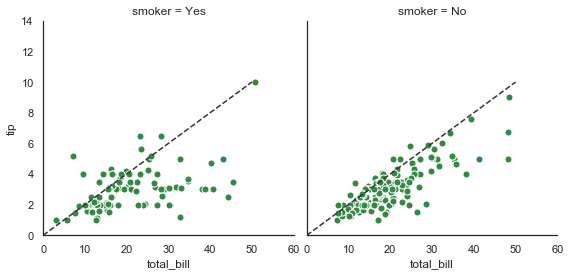

In [64]:
g = sns.FacetGrid(df, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)

for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")

g.set(xlim=(0, 60), ylim=(0, 14));

## Send email - Try 1

In [ ]:
# https://myaccount.google.com/

In [ ]:
# %%writefile config.json
# {
#     "username":"your username",
#     "password":"your app password",
#     "sender": "your sender email id"
# }

In [88]:
import smtplib
from email.mime.text import MIMEText
import json

with open("config.json") as f:
    config = json.load(f)
    
smtp_ssl_host = 'smtp.gmail.com'  # smtp.mail.yahoo.com
smtp_ssl_port = 465

username = config['username']
password = config['password']

sender = config['sender']
targets = ['balaprasannav2009@gmail.com']

from datetime import datetime
msg = MIMEText('Current time.... '+ str(datetime.now()))
msg['Subject'] = 'Hello'
msg['From'] = sender
msg['To'] = ', '.join(targets)

server = smtplib.SMTP_SSL(smtp_ssl_host, smtp_ssl_port)
server.login(username, password)
server.sendmail(sender, targets, msg.as_string())
server.quit()

(221, b'2.0.0 closing connection s24sm1264656pfh.108 - gsmtp')

In [70]:
# np.array((10,20)) / 2

## sending email with attachment

In [89]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
import json

with open("config.json") as f:
    config = json.load(f)
    
smtp_ssl_host = 'smtp.gmail.com'  # smtp.mail.yahoo.com
smtp_ssl_port = 465

username = config['username']
password = config['password']

sender = config['sender']
targets = ['balaprasannav2009@gmail.com']


In [90]:
msg = MIMEMultipart()

msg['Subject'] = 'I have a picture'
msg['From'] = sender
msg['To'] = ', '.join(targets)

txt = MIMEText('I just bought a new camera.')
msg.attach(txt)

filepath = r"C:/Users/balap/Downloads/imgs/carolburnett1.jpg"
with open(filepath, 'rb') as f:
    img = MIMEImage(f.read())

img.add_header('Content-Disposition',
               'attachment',
               filename=os.path.basename(filepath))
msg.attach(img)


server = smtplib.SMTP_SSL(smtp_ssl_host, smtp_ssl_port)
server.login(username, password)
server.sendmail(sender, targets, msg.as_string())
server.quit()

(221, b'2.0.0 closing connection f189sm1707120pgc.94 - gsmtp')